Gradient Descent with California Housing Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import _california_housing

In [6]:
housing_data = _california_housing.fetch_california_housing()

In [7]:
features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
target = pd.DataFrame(housing_data.target, columns=['Target'])

In [8]:
df = features.join(target)

In [9]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [10]:
df[['MedInc', 'Target']].describe()

,MedInc,Target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


In [11]:
df = df[df.Target < 3.5]
df = df[df.MedInc < 8]


In [14]:
df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
mean,3.482030,1.722805
std,1.364922,0.749957
min,0.499900,0.149990
25%,2.452025,1.119000
50%,3.303600,1.635000
75%,4.346050,2.256000
max,7.988700,3.499000


In [15]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min) / (max - min) for i in x])

X = scale(df.MedInc)
y = scale(df.Target)

In [16]:
X.max(), y.max()

(1.0, 1.0)

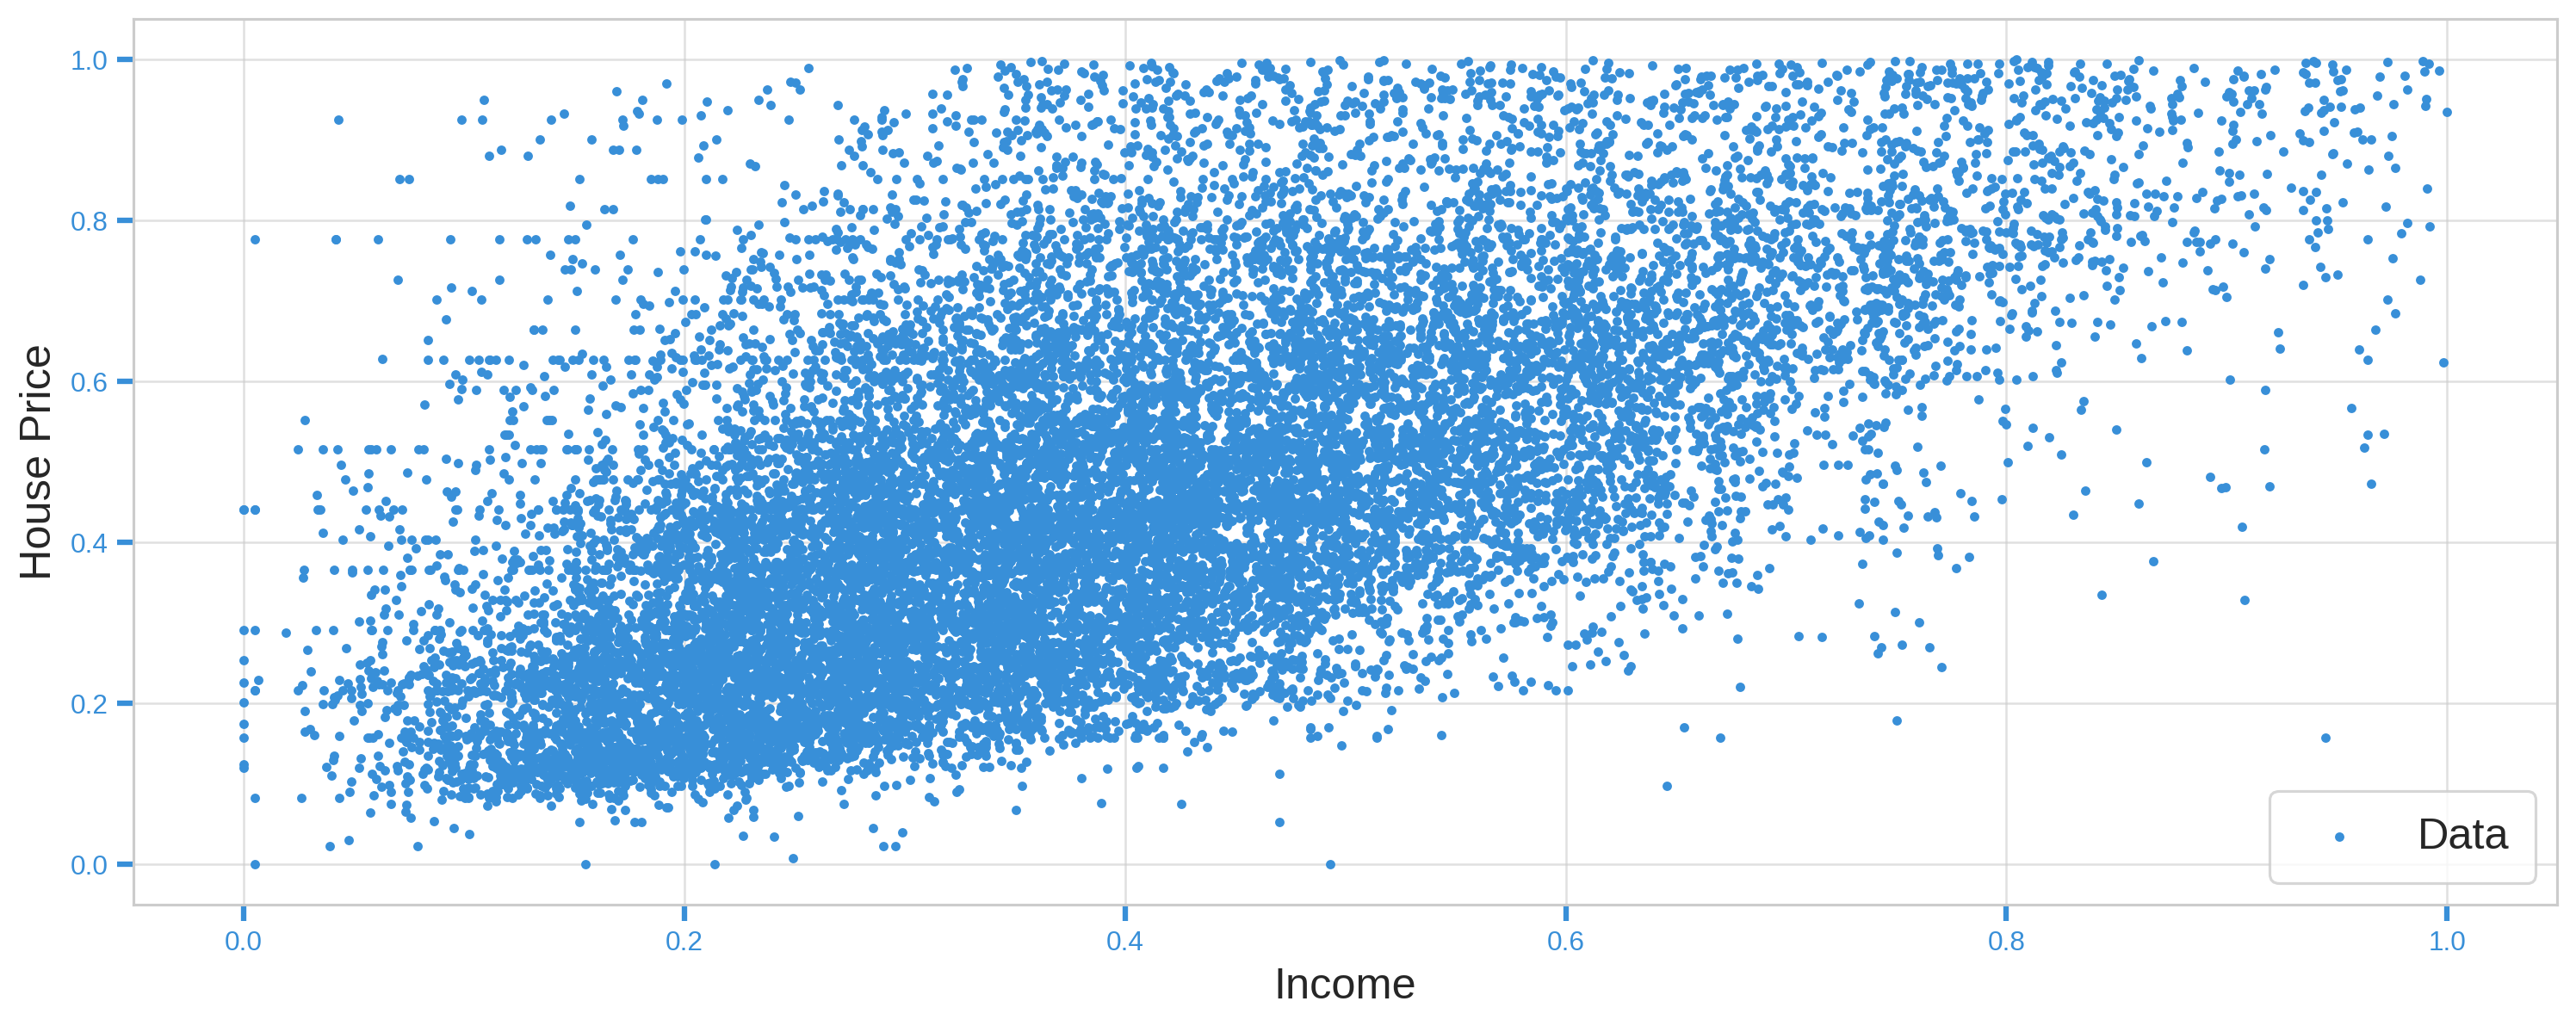

In [31]:
# Corelation between price and income
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
plt.style.use('seaborn-whitegrid')
plt.scatter(X, y, s=6, c='#388fd8', label='Data', )
plt.xlabel('Income', fontsize=16)
plt.ylabel('House Price', fontsize=16)
plt.legend(loc='best', fontsize=16, frameon=True, borderpad=0.6)
plt.tick_params(direction='out', length=6, width=2, colors='#388fd8', grid_alpha=0.6)
plt.show()


In [32]:
class SimpleLinearRegression:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y)) - np.mean(X * y)) / ((np.mean(X) ** 2) - np.mean(X ** 2))
        self.b = np.mean(y) - self.m * np.mean(X)

    def coeff(self):
        return self.m, self.b

    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred

    def r_squared(self):
        self.y_mean = np.full(len(self.y), np.mean(self.y))
        err_reg = sum((self.y - self.y_pred) ** 2)
        err_y_mean = sum((self.y - self.y_mean) ** 2)
        return 1 - (err_reg / err_y_mean)

    

In [34]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.style.use('seaborn-whitegrid')
    plt.scatter(X, y, s=6, c='#388fd8', label='Data', )
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#ff0000', alpha=0.3) 
    plt.plot(X, y_pred, c='#ff0000', label='Regression', )
    plt.xlabel('Income', fontsize=16)
    plt.ylabel('Price', fontsize=16)
    plt.legend(loc='best', fontsize=16, frameon=True, borderpad=0.6)
    plt.tick_params(direction='out', length=6, width=2, colors='#388fd8', grid_alpha=0.6)
     
    plt.show()

In [35]:
X = df.MedInc
y = df.Target

In [36]:
lr = SimpleLinearRegression()

In [37]:
lr.fit(X, y)

In [38]:
y_pred = lr.predict()

MSE:  0.3432052150225597


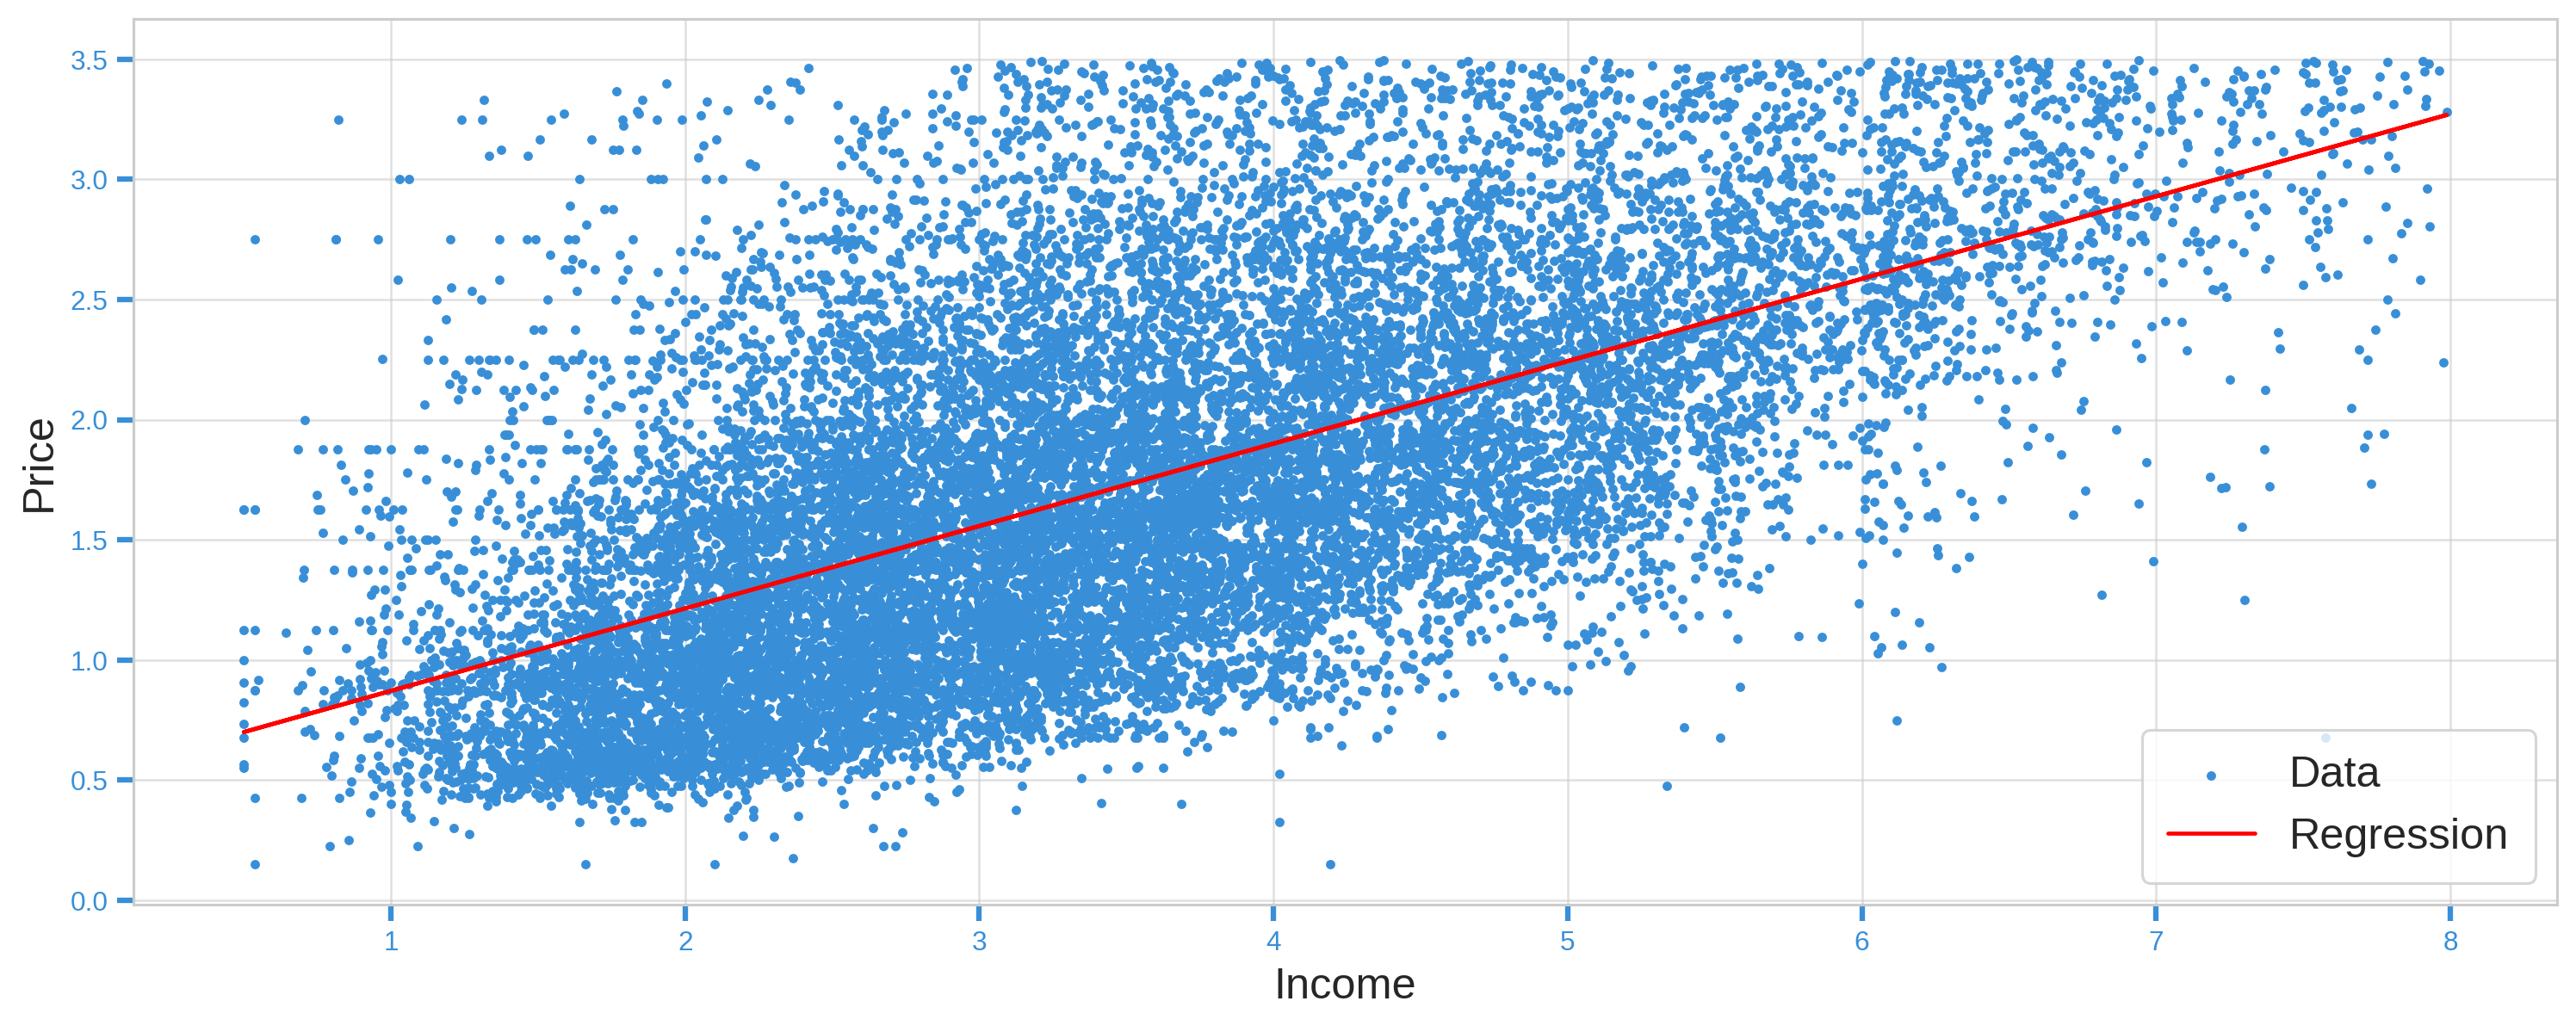

In [39]:
print("MSE: ", mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, title="Linear Regression")